In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
# import AxonDeepSeg.ads_utils as ads
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"
%config InlineBackend.figure_format = 'retina'

In [17]:
def cal_sem(x):
    sem = stats.sem(x)
    return x.mean() - sem, x.mean() + sem

In [4]:
# %%bash
# axondeepseg -t TEM -i ./TEM_RNAse4/*/ -s 0.032 -v 1

In [5]:
img = mpl.image.imread('/Users/pax/Downloads/TEM_RNAse4/1_PM_c/XF-23-61_1-523-S1_1A_axonmyelin_index.png')

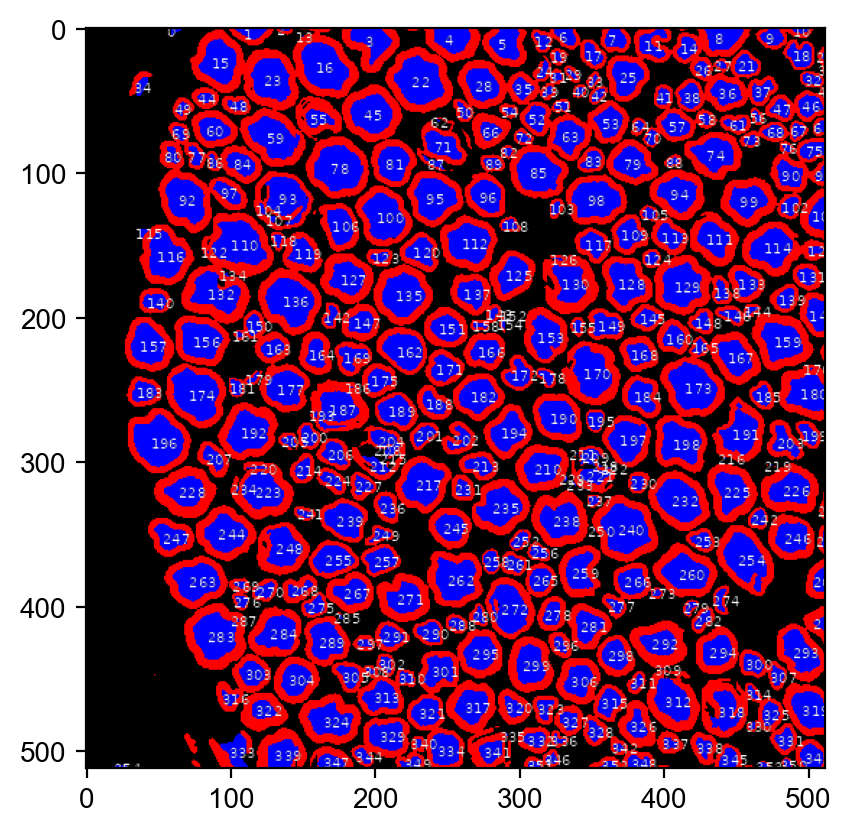

In [6]:
plt.imshow(img)

# Rnase4 img quant

In [2]:
df = pd.read_excel('./RNAse4_dian.xlsx')

In [10]:
df['group'] = df.Diameter.apply(lambda x: '<20' if x < 20 else ('20-35' if 20<x<35 else '>35'))

In [11]:
df['group'] = df['group'].astype('category').cat.add_categories(['>35']).cat.reorder_categories(['<20','20-35','>35'])

In [19]:
df_plot = df.groupby(['Mouse']).group.value_counts(normalize=True).to_frame('value').reset_index()

In [23]:
df_plot.to_excel('./tables/RNAse4_dian_plot.xlsx', index=False)

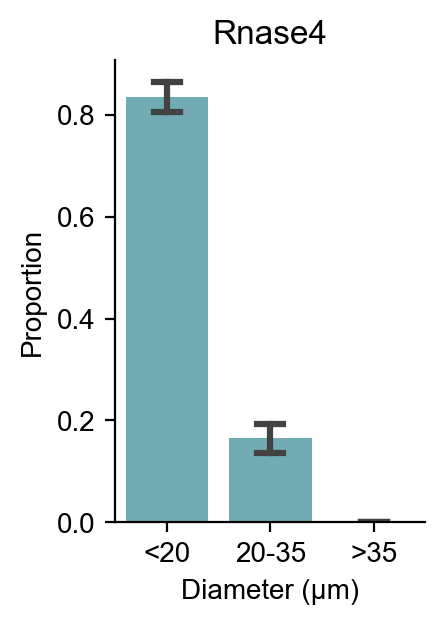

In [ ]:
fig, ax = plt.subplots(figsize=(2, 3))
sns.barplot(data=df_plot, x='group', y='value', color=(0.4, 0.71, 0.75), edgecolor=None, errorbar=cal_sem, capsize=0.25)
ax.set_title('Rnase4', fontsize=12)
ax.set_ylabel('Proportion')
ax.set_xlabel('Diameter (µm)')
for i in ['right', 'top']:
    ax.spines[i].set_visible(False)
fig.savefig('./figures/rnase4_diameter_hist_new.pdf', bbox_inches='tight', dpi=300)

# Prdm12CreERT2 Quant

In [24]:
df1 = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/Prdm12CreERT2_Ai14_Quant.xlsx')

In [25]:
df1['Day'] = df1.Mouse.str.split('_').str[-1].astype('category').cat.reorder_categories(['D3','D5'])

In [26]:
df1_mouse = df1.groupby('Mouse').Proportion.mean().to_frame()

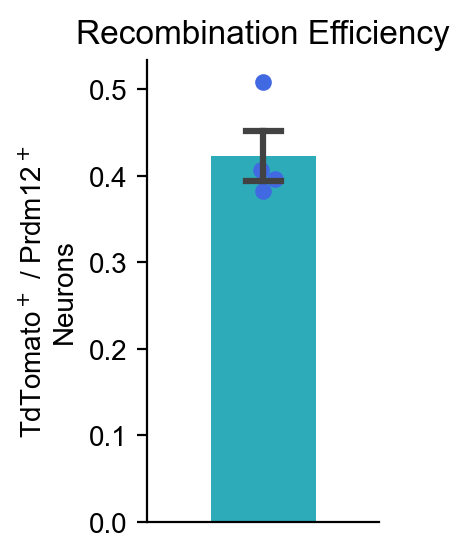

In [ ]:
fig, ax = plt.subplots(figsize=(1.5, 3))
sns.barplot(data=df1_mouse, y='Proportion', errorbar=cal_sem, capsize=0.15, ax=ax, color='tab:cyan', width=0.45)
sns.swarmplot(data=df1_mouse, y='Proportion', ax=ax, color='royalblue', s=6, zorder=1)
ax.set_title('Recombination Efficiency')
ax.set_ylabel('TdTomato$^+$ / Prdm12$^+$\nNeurons')
ax.set_xticks([])
for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/Prdm12CreERT2_Ai14_recom_eff_all.pdf', bbox_inches='tight', dpi=300)

# TEM quant plots

## G-ratio

In [3]:
df_tem_g = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/TEM_quant_prep.xlsx', sheet_name='g_ratio')

In [4]:
df_tem_g['SC'] = df_tem_g.Strain + '_' + df_tem_g.Conditions

In [5]:
df_tem_g['marker'] = df_tem_g.Conditions.map({'Contra':'o', 'Ipsi':'x'})

In [6]:
palette = {'Prdm12creAi14_Contra': 'hotpink', 'Prdm12Rnase4flflcreAi14_Contra': 'gray','Prdm12creAi14_Ipsi':'tab:red', 'Prdm12Rnase4flflcreAi14_Ipsi':'black'}

In [7]:
df_tem_g

,Strain,Sex,Conditions,gratio,axon_diam (um),SC,marker
0,Prdm12creAi14,Male,Contra,0.711266,5.328958,Prdm12creAi14_Contra,o
1,Prdm12creAi14,Male,Contra,0.724286,3.639613,Prdm12creAi14_Contra,o
2,Prdm12creAi14,Male,Contra,0.656971,3.428778,Prdm12creAi14_Contra,o
3,Prdm12creAi14,Male,Contra,0.647527,4.199379,Prdm12creAi14_Contra,o
4,Prdm12creAi14,Male,Contra,0.592749,2.541222,Prdm12creAi14_Contra,o
...,...,...,...,...,...,...,...
6467,Prdm12Rnase4flflcreAi14,Female,Ipsi,0.645497,1.438683,Prdm12Rnase4flflcreAi14_Ipsi,x
6468,Prdm12Rnase4flflcreAi14,Female,Ipsi,0.620174,1.575999,Prdm12Rnase4flflcreAi14_Ipsi,x
6469,Prdm12Rnase4flflcreAi14,Female,Ipsi,0.791623,2.789711,Prdm12Rnase4flflcreAi14_Ipsi,x
6470,Prdm12Rnase4flflcreAi14,Female,Ipsi,0.657129,1.254215,Prdm12Rnase4flflcreAi14_Ipsi,x


In [8]:
reg = df_tem_g.groupby('SC').apply(lambda x: stats.pearsonr(x['gratio'], x['axon_diam (um)'])[0]).to_frame()[0].to_dict()

In [9]:
reg

{'Prdm12Rnase4flflcreAi14_Contra': 0.37958634394949897,
 'Prdm12Rnase4flflcreAi14_Ipsi': 0.6725135502165605,
 'Prdm12creAi14_Contra': 0.4160735650342424,
 'Prdm12creAi14_Ipsi': 0.6519561359547353}

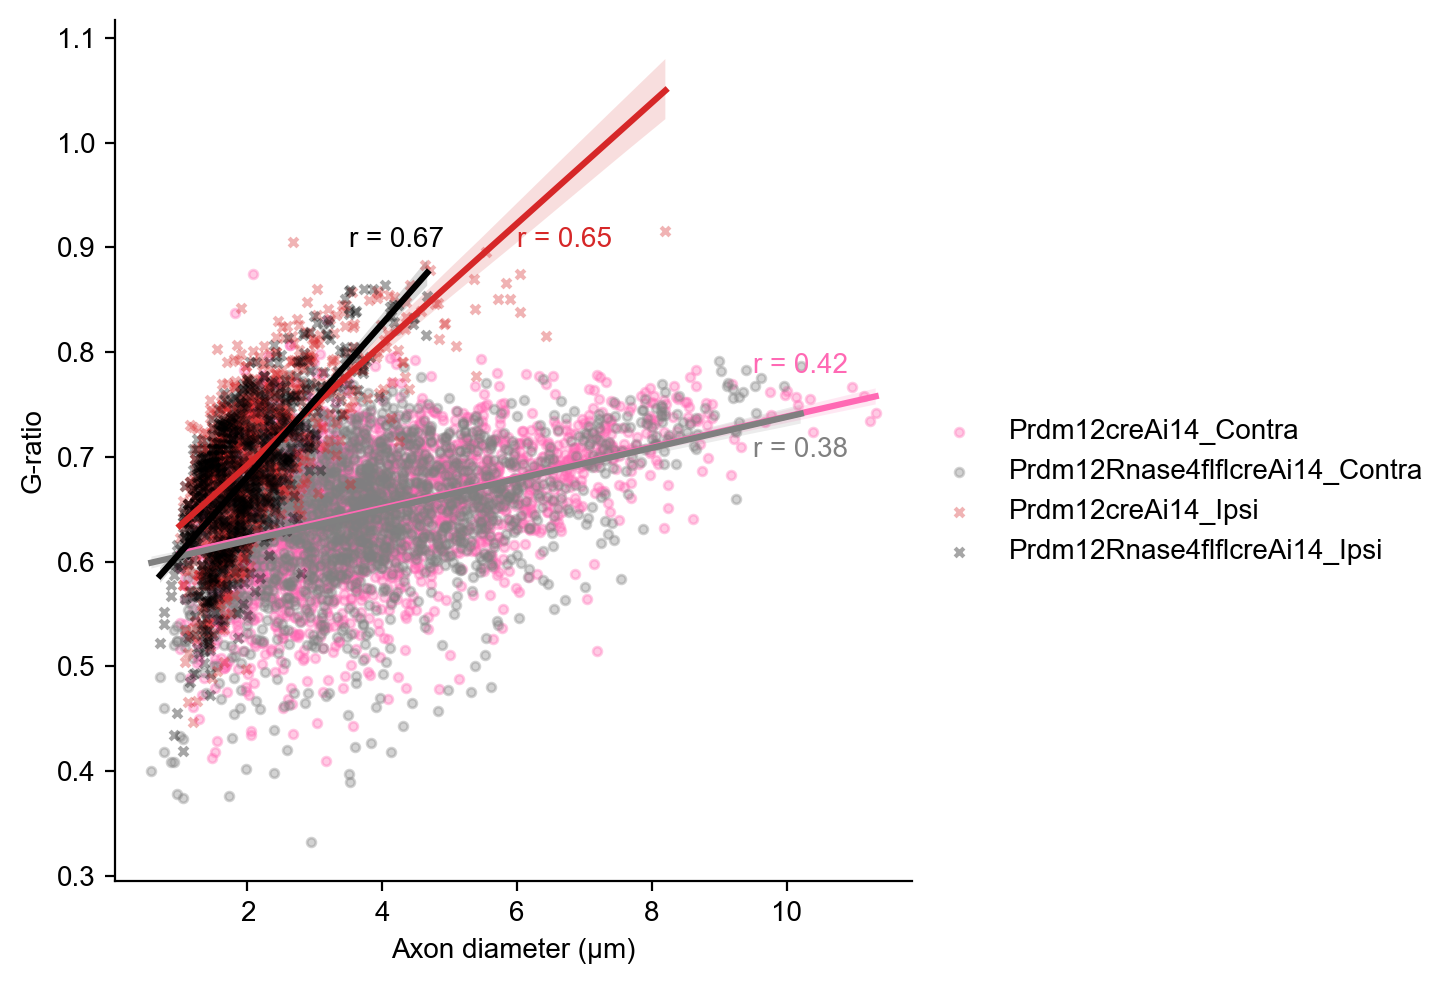

In [72]:
g = sns.lmplot(data=df_tem_g, x="axon_diam (um)", y="gratio", hue='SC', scatter_kws={'alpha' : 0.35, 's': 10}, markers=['o','o','x','x'], palette=palette)
g.set_axis_labels('Axon diameter (µm)', 'G-ratio')
g.legend.set_title(None)
g.ax.text(3.5, 0.9, f"r = {reg['Prdm12Rnase4flflcreAi14_Ipsi']:.2f}")
g.ax.text(6, 0.9, f"r = {reg['Prdm12creAi14_Ipsi']:.2f}", color=palette['Prdm12creAi14_Ipsi'])
g.ax.text(9.5, 0.78, f"r = {reg['Prdm12creAi14_Contra']:.2f}", color=palette['Prdm12creAi14_Contra'])
g.ax.text(9.5, 0.7, f"r = {reg['Prdm12Rnase4flflcreAi14_Contra']:.2f}", color=palette['Prdm12Rnase4flflcreAi14_Contra'])
g.savefig('./figures/g_ratio_vs_axon_diameter.pdf', bbox_inches='tight', dpi=300)

In [ ]:
test_res = pd.DataFrame(columns=['group1','group2','p'])
for i in df_tem_g.SC.unique():
    for j in df_tem_g.SC.unique()[1:]:
        res = stats.ttest_ind(df_tem_g[df_tem_g.SC == i].gratio, df_tem_g[df_tem_g.SC == j].gratio)
        test_res.loc[len(test_res)] = [i, j, res.pvalue]
        
test_res = test_res.loc[lambda x: x.group1 != x.group2]
test_res = test_res[~test_res[['group1','group2']].apply(frozenset, axis=1).duplicated()].reset_index(drop=True)
test_res['p_adj'] = multipletests(test_res.p, method='fdr_bh')[1]

In [13]:
test_res

,group1,group2,p,p_adj
0,Prdm12creAi14_Contra,Prdm12Rnase4flflcreAi14_Contra,4.318048e-02,4.318048e-02
1,Prdm12creAi14_Contra,Prdm12creAi14_Ipsi,1.474155e-82,8.844930e-82
2,Prdm12creAi14_Contra,Prdm12Rnase4flflcreAi14_Ipsi,3.769201e-27,5.653802e-27
3,Prdm12Rnase4flflcreAi14_Contra,Prdm12creAi14_Ipsi,2.972523e-80,8.917568e-80
4,Prdm12Rnase4flflcreAi14_Contra,Prdm12Rnase4flflcreAi14_Ipsi,1.270205e-29,2.540410e-29
5,Prdm12creAi14_Ipsi,Prdm12Rnase4flflcreAi14_Ipsi,1.048209e-10,1.257851e-10


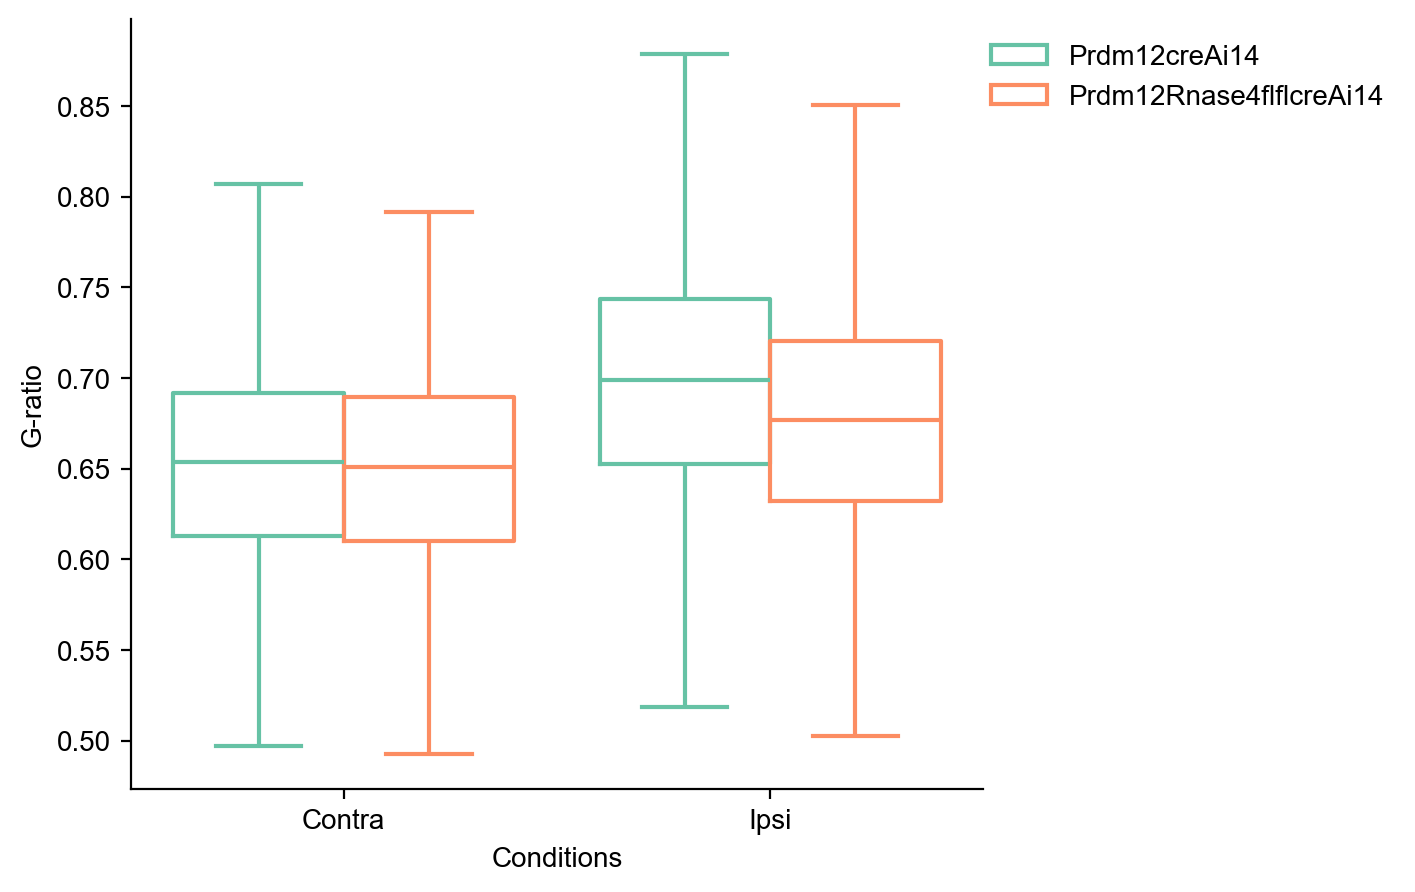

In [77]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(data=df_tem_g, x='Conditions', y='gratio', hue='Strain', showfliers=False, palette='Set2', ax=ax, fill=False)
ax.legend_.set_bbox_to_anchor((1.5, 1))
ax.legend_.set_title(None)
ax.legend_.set_frame_on(False)
ax.set_ylabel('G-ratio')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/gratio.pdf', bbox_inches='tight', dpi=300)

## Axon Diameter

In [ ]:
test_res = pd.DataFrame(columns=['group1','group2','p'])
for i in df_tem_g.SC.unique():
    for j in df_tem_g.SC.unique()[1:]:
        res = stats.ttest_ind(df_tem_g[df_tem_g.SC == i]['axon_diam (um)'], df_tem_g[df_tem_g.SC == j]['axon_diam (um)'])
        test_res.loc[len(test_res)] = [i, j, res.pvalue]

test_res = test_res.loc[lambda x: x.group1 != x.group2]
test_res = test_res[~test_res[['group1','group2']].apply(frozenset, axis=1).duplicated()].reset_index(drop=True)
test_res['p_adj'] = multipletests(test_res.p, method='fdr_bh')[1]

In [39]:
test_res

,group1,group2,p,p_adj
0,Prdm12creAi14_Contra,Prdm12Rnase4flflcreAi14_Contra,6.520647e-03,6.520647e-03
1,Prdm12creAi14_Contra,Prdm12creAi14_Ipsi,2.784053e-181,5.568106e-181
2,Prdm12creAi14_Contra,Prdm12Rnase4flflcreAi14_Ipsi,4.252535e-206,2.551521e-205
3,Prdm12Rnase4flflcreAi14_Contra,Prdm12creAi14_Ipsi,1.472312e-161,2.208468e-161
4,Prdm12Rnase4flflcreAi14_Contra,Prdm12Rnase4flflcreAi14_Ipsi,1.234652e-187,3.703955e-187
5,Prdm12creAi14_Ipsi,Prdm12Rnase4flflcreAi14_Ipsi,1.649177e-06,1.979012e-06


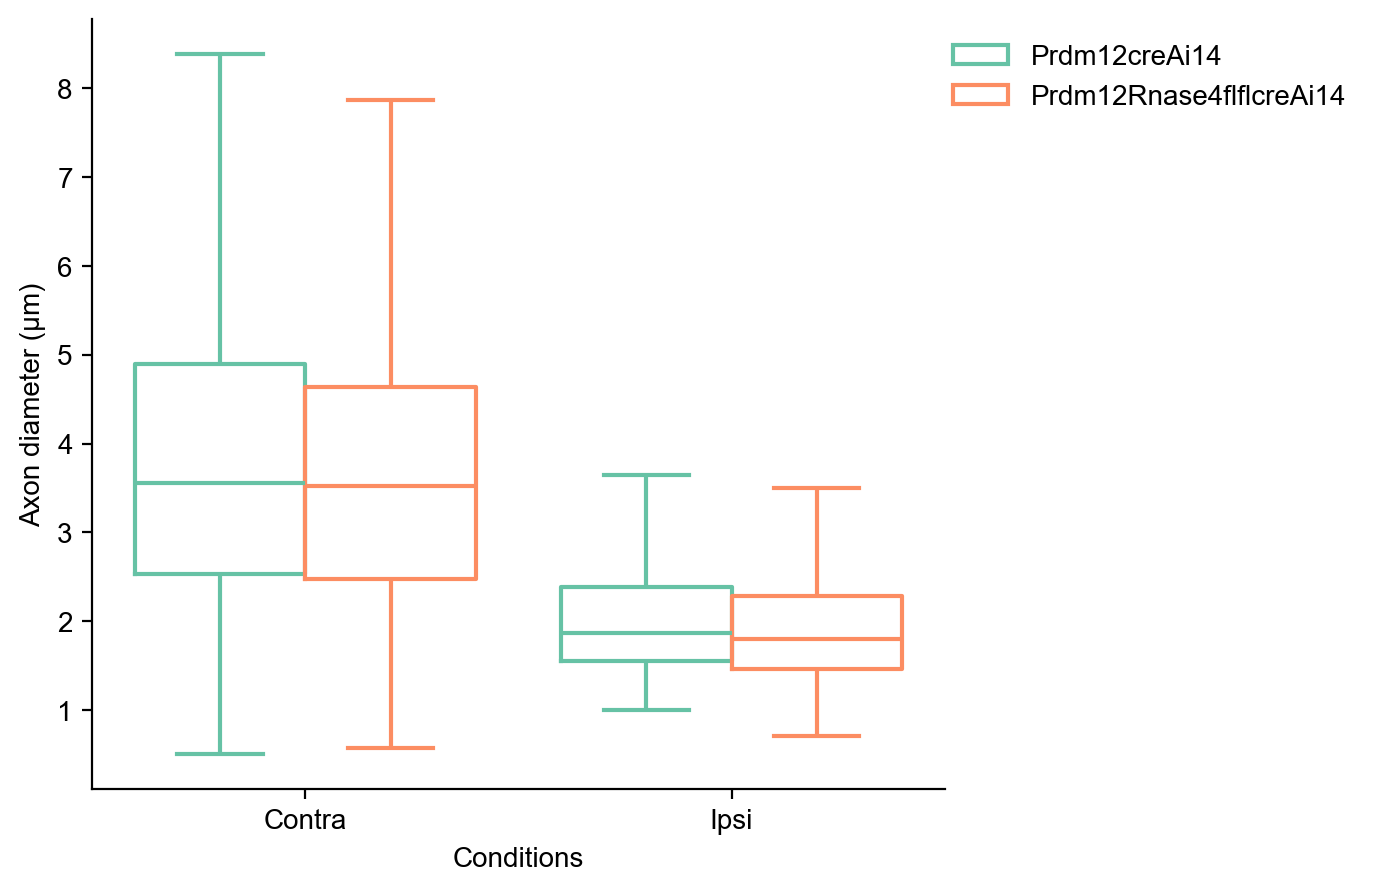

In [45]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(data=df_tem_g, x='Conditions', y='axon_diam (um)', hue='Strain', showfliers=False, palette='Set2', ax=ax, fill=False)
ax.legend_.set_bbox_to_anchor((1.5, 1))
ax.legend_.set_title(None)
ax.legend_.set_frame_on(False)
ax.set_ylabel('Axon diameter (µm)')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/axon_dia.pdf', bbox_inches='tight', dpi=300)

## Number of Axon per $mm^2$

In [40]:
df_tem_axon = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/TEM_quant_prep.xlsx', sheet_name='axon_per_mm2')

In [41]:
df_tem_axon['SC'] = df_tem_axon.Strain.astype(str) + '_' + df_tem_axon.Conditions.astype(str)

In [42]:
df_tem_axon

,Strain,Sex,Conditions,axon_per_mm2,Mouse_id,SC
0,Prdm12creAi14,Male,Contra,19076.569482,1,Prdm12creAi14_Contra
1,Prdm12creAi14,Male,Contra,23343.539838,1,Prdm12creAi14_Contra
2,Prdm12creAi14,Male,Contra,23809.129607,1,Prdm12creAi14_Contra
3,Prdm12creAi14,Male,Contra,13990.751285,5,Prdm12creAi14_Contra
4,Prdm12creAi14,Male,Contra,22668.559044,5,Prdm12creAi14_Contra
5,Prdm12creAi14,Male,Contra,16824.321165,5,Prdm12creAi14_Contra
6,Prdm12creAi14,Female,Contra,9154.837037,2,Prdm12creAi14_Contra
7,Prdm12creAi14,Female,Contra,20978.009347,2,Prdm12creAi14_Contra
8,Prdm12creAi14,Female,Contra,18382.268031,2,Prdm12creAi14_Contra
9,Prdm12Rnase4flflcreAi14,Male,Contra,26829.179788,3,Prdm12Rnase4flflcreAi14_Contra


In [ ]:
test_res_bundle = pd.DataFrame(columns=['group1','group2','p'])
for i in df_tem_axon.SC.unique():
    for j in df_tem_axon.SC.unique()[1:]:
        res = stats.ttest_ind(df_tem_axon[df_tem_axon.SC == i]['axon_per_mm2'], df_tem_axon[df_tem_axon.SC == j]['axon_per_mm2'])
        test_res_bundle.loc[len(test_res_bundle)] = [i, j, res.pvalue]

test_res_bundle = test_res_bundle.loc[lambda x: x.group1 != x.group2]
test_res_bundle = test_res_bundle[~test_res_bundle[['group1','group2']].apply(frozenset, axis=1).duplicated()].reset_index(drop=True)
test_res_bundle['p_adj'] = multipletests(test_res_bundle.p, method='fdr_bh')[1]
test_res_bundle

,group1,group2,p,p_adj
0,Prdm12creAi14_Contra,Prdm12Rnase4flflcreAi14_Contra,0.480259,0.480259
1,Prdm12creAi14_Contra,Prdm12creAi14_Ipsi,0.000004,0.000013
2,Prdm12creAi14_Contra,Prdm12Rnase4flflcreAi14_Ipsi,0.002041,0.003061
3,Prdm12Rnase4flflcreAi14_Contra,Prdm12creAi14_Ipsi,0.000001,0.000006
4,Prdm12Rnase4flflcreAi14_Contra,Prdm12Rnase4flflcreAi14_Ipsi,0.000173,0.000346
5,Prdm12creAi14_Ipsi,Prdm12Rnase4flflcreAi14_Ipsi,0.002656,0.003187


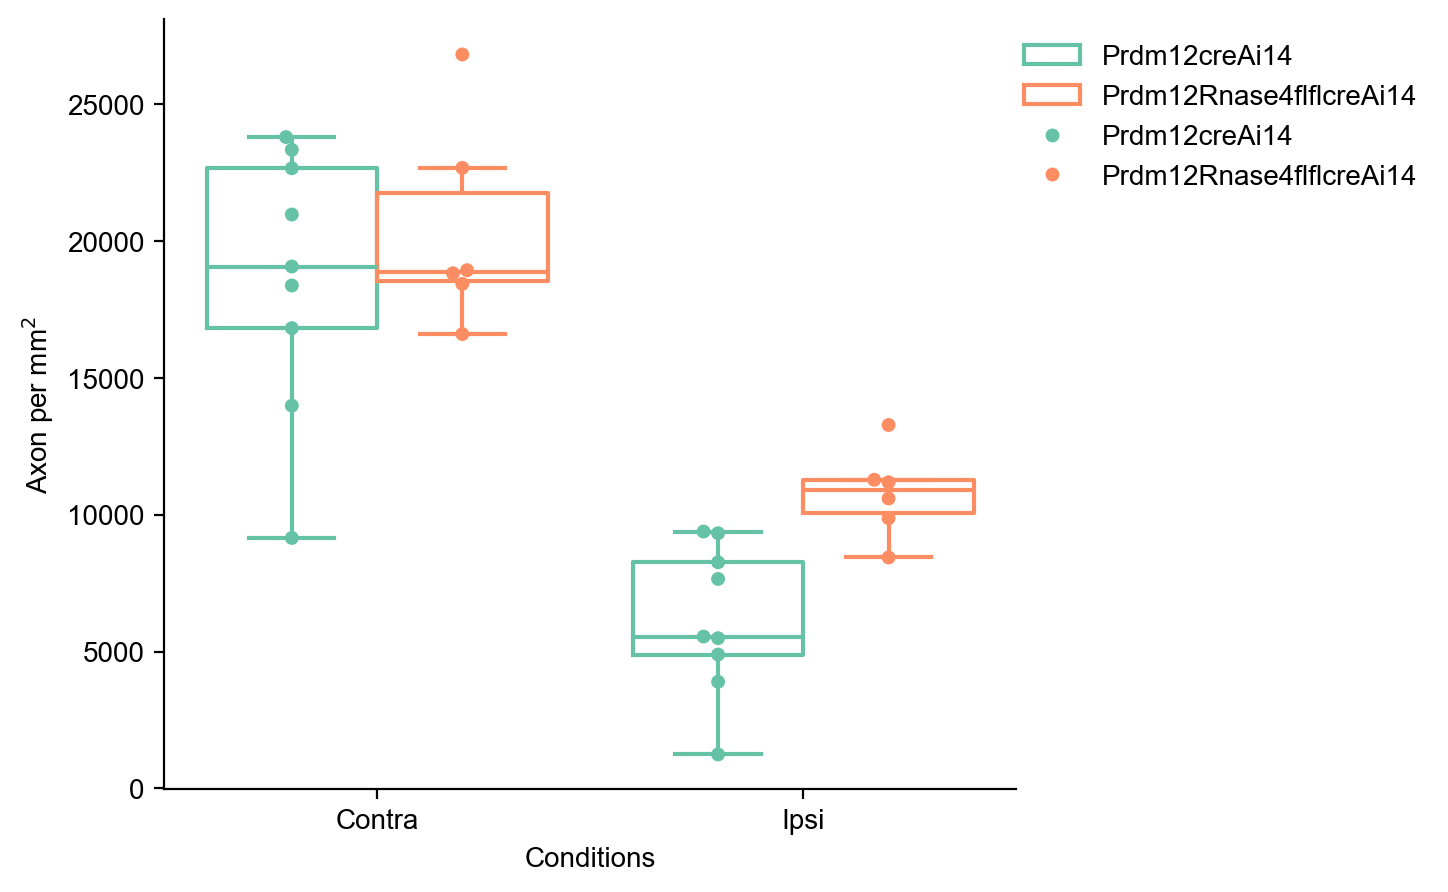

In [50]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(data=df_tem_axon, x='Conditions', y='axon_per_mm2', hue='Strain', showfliers=False, palette='Set2', ax=ax, fill=False)
sns.swarmplot(data=df_tem_axon, x='Conditions', y='axon_per_mm2', hue='Strain', dodge=True, palette='Set2', ax=ax, s=5, legend=True)
ax.legend_.set_bbox_to_anchor((1.5, 1))
ax.legend_.set_title(None)
ax.legend_.set_frame_on(False)
ax.set_ylabel('Axon per mm$^2$')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/axon_per_mm2.pdf', bbox_inches='tight', dpi=300)

## Number of Remak Bundle per $mm^2$

In [66]:
df_tem_rem = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/TEM_quant_prep.xlsx', sheet_name='remark_per_mm2')

In [67]:
df_tem_rem['SC'] = df_tem_rem.Strain.astype(str) + '_' + df_tem_rem.Conditions.astype(str)

In [ ]:
test_res_bundle = pd.DataFrame(columns=['group1','group2','p'])
for i in df_tem_rem.SC.unique():
    for j in df_tem_rem.SC.unique()[1:]:
        res = stats.ttest_ind(df_tem_rem[df_tem_rem.SC == i]['remark_per_mm2'], df_tem_rem[df_tem_rem.SC == j]['remark_per_mm2'])
        test_res_bundle.loc[len(test_res_bundle)] = [i, j, res.pvalue]

test_res_bundle = test_res_bundle.loc[lambda x: x.group1 != x.group2]
test_res_bundle = test_res_bundle[~test_res_bundle[['group1','group2']].apply(frozenset, axis=1).duplicated()].reset_index(drop=True)
test_res_bundle = test_res_bundle[test_res_bundle.index.isin([0,1,4,5])].reset_index(drop=True)
test_res_bundle['p_adj'] = multipletests(test_res_bundle.p, method='fdr_bh')[1]

In [65]:
test_res_bundle

,group1,group2,p,p_adj
0,Prdm12creAi14_Contra,Prdm12Rnase4flflcreAi14_Contra,0.096343,0.192685
1,Prdm12creAi14_Contra,Prdm12creAi14_Ipsi,0.644689,0.644689
2,Prdm12Rnase4flflcreAi14_Contra,Prdm12Rnase4flflcreAi14_Ipsi,0.011510,0.046040
3,Prdm12creAi14_Ipsi,Prdm12Rnase4flflcreAi14_Ipsi,0.518081,0.644689


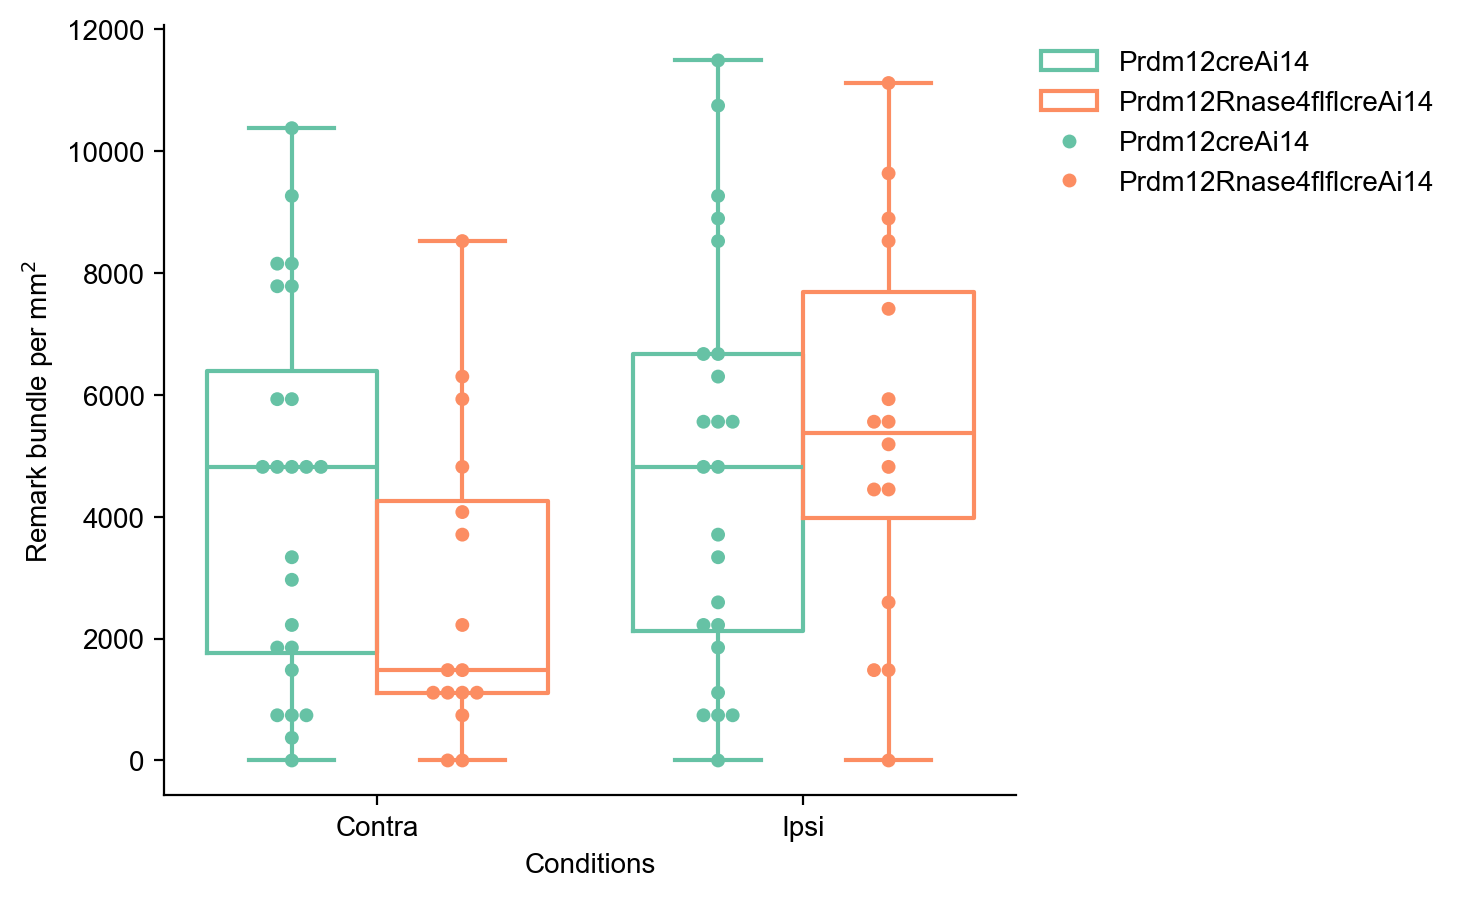

In [55]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(data=df_tem_rem, x='Conditions', y='remark_per_mm2', hue='Strain', showfliers=False, palette='Set2', ax=ax, fill=False)
sns.swarmplot(data=df_tem_rem, x='Conditions', y='remark_per_mm2', hue='Strain', dodge=True, palette='Set2', ax=ax, s=5, legend=True)
ax.legend_.set_bbox_to_anchor((1, 1))
ax.legend_.set_title(None)
ax.legend_.set_frame_on(False)
ax.set_ylabel('Remark bundle per mm$^2$')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/remark_per_mm2.pdf', bbox_inches='tight', dpi=300)

## Number of Myelinating Axons per $mm^2$

In [61]:
df_mye_mm = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/TEM_quant_prep.xlsx', sheet_name='myel_axon_mm')

In [62]:
stats.ttest_ind(df_mye_mm[df_mye_mm.Strain == 'Prdm12cre contra'].Values,
                df_mye_mm[df_mye_mm.Strain == 'Prdm12creRNase4flfl contra'].Values)

TtestResult(statistic=-0.6576132723849634, pvalue=0.5147506731391681, df=38.0)

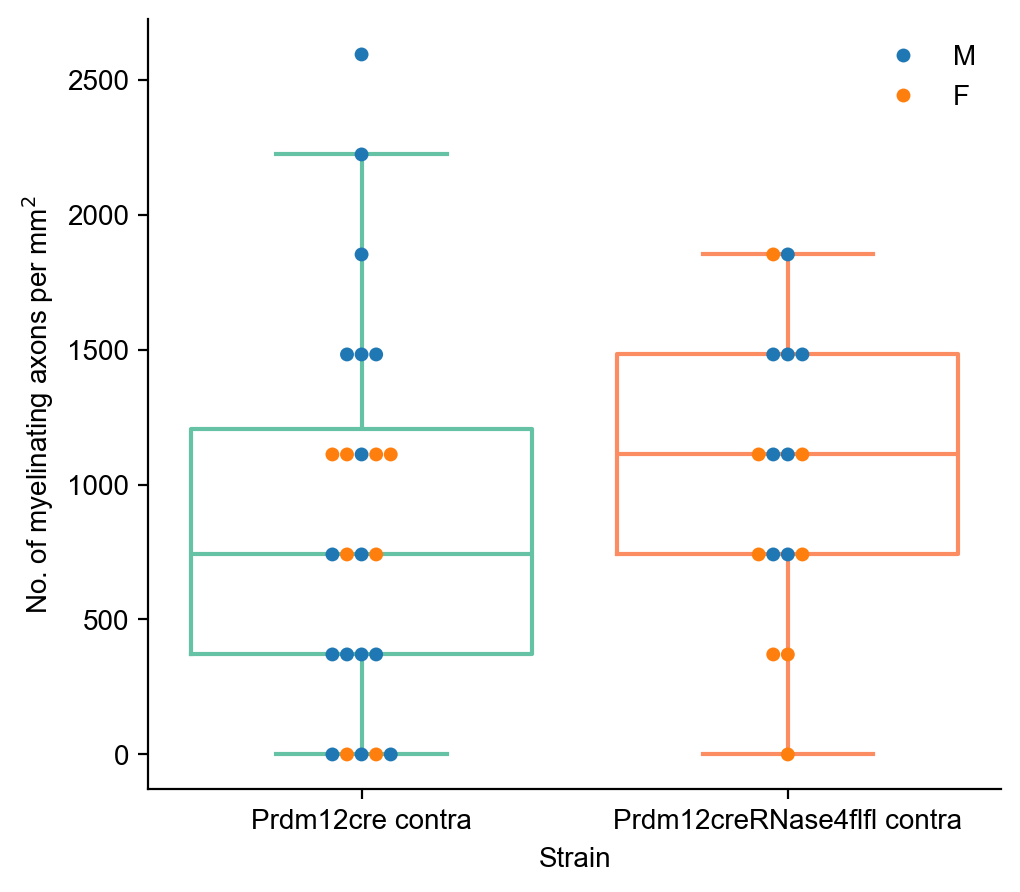

In [64]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(data=df_mye_mm, x='Strain', y='Values', hue='Strain', showfliers=False, palette='Set2', fill=False, ax=ax)
sns.swarmplot(data=df_mye_mm, x='Strain', y='Values', hue='Sex', palette='tab10', ax=ax, s=5)
ax.legend_.set_bbox_to_anchor((1, 1))
ax.legend_.set_title(None)
ax.legend_.set_frame_on(False)
ax.set_ylabel('No. of myelinating axons per mm$^2$')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/myeline_axon_mm.pdf', bbox_inches='tight', dpi=300)

## Number of c-fiber per Bundle

In [96]:
df_cfib = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/TEM_quant_prep.xlsx', sheet_name='cfiber_bundle')

In [97]:
def group_val(x):
    if x < 5:
        return '<5'
    elif 5 <= x < 10:
        return '5-10'
    elif 10 <= x < 15:
        return '10-15'
    else:
        return '>15'

In [98]:
df_cfib['groups'] = df_cfib.Values.apply(group_val)

In [ ]:
df_cfib[['Strains','Conditions']] = df_cfib.Strain.str.split(' ', expand=True)

In [99]:
df_cfib_groups = df_cfib.groupby(['Strain','Sex'])['groups'].value_counts(normalize=True).to_frame('values').reset_index()

In [ ]:
df_cfib_groups['groups'] = df_cfib_groups['groups'].astype('category').cat.reorder_categories(['<5','5-10','10-15','>15'])

In [ ]:
df_cfib_groups['Strain'] = df_cfib_groups['Strain'].astype('category').cat.reorder_categories(['Prdm12cre contra','Prdm12creRNase4flfl contra','Prdm12cre ipsi','Prdm12creRNase4flfl ipsi'])

In [ ]:
test_res_bundle = pd.DataFrame(columns=['group1','group2','p'])
for i in df_cfib.Strain.unique():
    for j in df_cfib.Strain.unique()[1:]:
        res = stats.ttest_ind(df_cfib[df_cfib.Strain == i]['Values'], df_cfib[df_cfib.Strain == j]['Values'])
        test_res_bundle.loc[len(test_res_bundle)] = [i, j, res.pvalue]

test_res_bundle = test_res_bundle.loc[lambda x: x.group1 != x.group2]
test_res_bundle['p_adj'] = multipletests(test_res_bundle.p, method='fdr_bh')[1]

In [91]:
test_res_bundle

,group1,group2,p,p_adj
0,Prdm12cre contra,Prdm12creRNase4flfl contra,5.913931e-03,1.064508e-02
1,Prdm12cre contra,Prdm12cre ipsi,4.728754e-10,4.255878e-09
2,Prdm12cre contra,Prdm12creRNase4flfl ipsi,2.670836e-04,1.201876e-03
4,Prdm12creRNase4flfl contra,Prdm12cre ipsi,8.306061e-04,1.868864e-03
5,Prdm12creRNase4flfl contra,Prdm12creRNase4flfl ipsi,2.000304e-01,2.000304e-01
6,Prdm12cre ipsi,Prdm12creRNase4flfl contra,8.306061e-04,1.868864e-03
8,Prdm12cre ipsi,Prdm12creRNase4flfl ipsi,1.113900e-01,1.432157e-01
9,Prdm12creRNase4flfl ipsi,Prdm12creRNase4flfl contra,2.000304e-01,2.000304e-01
10,Prdm12creRNase4flfl ipsi,Prdm12cre ipsi,1.113900e-01,1.432157e-01


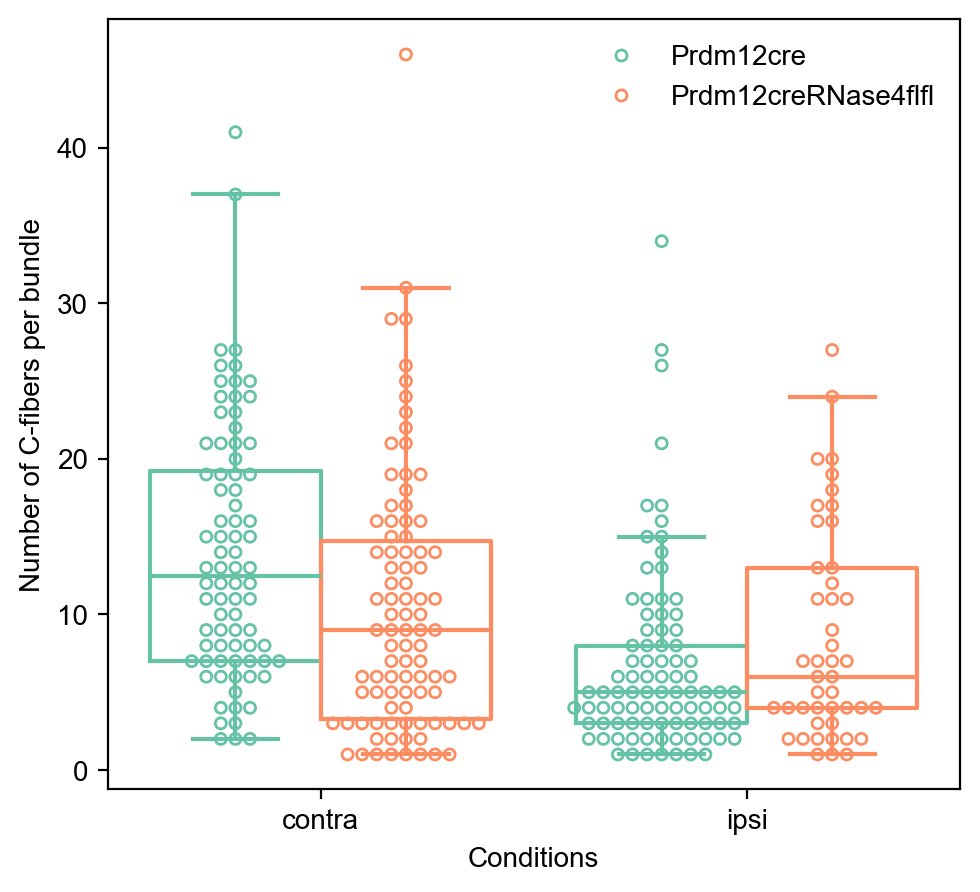

In [93]:
fig, ax = plt.subplots(figsize=(5.5, 5))
sns.boxplot(data=df_cfib, x='Conditions', y='Values', hue='Strains', showfliers=False, palette='Set2', ax=ax, fill=False, legend=False)
sns.swarmplot(data=df_cfib, x='Conditions', y='Values', hue='Strains', palette='Set2', ax=ax, s=5, dodge=True, zorder=1, marker='$\circ$')
ax.legend_.set_bbox_to_anchor((1, 1))
ax.legend_.set_title(None)
ax.legend_.set_frame_on(False)
ax.set_ylabel('Number of C-fibers per bundle')
fig.savefig('./figures/boxplot_num_cfib_bundle.pdf', bbox_inches='tight', dpi=300)

## Number of Macrophages per $mm^2$

In [5]:
df_macro = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/TEM_quant_prep.xlsx', sheet_name='numb_macro')

In [6]:
df_macro

,Mouse,IMG_num,Strain,numb_macro,numb_debris
0,1,1,Prdm12cre ipsi,1991.80,6784.58
1,1,2,Prdm12cre ipsi,2604.30,7691.78
2,1,3,Prdm12cre ipsi,2892.60,8205.55
3,2,1,Prdm12cre ipsi,2267.33,4654.00
4,2,2,Prdm12cre ipsi,2243.24,5017.78
5,2,3,Prdm12cre ipsi,2007.11,5076.81
6,3,1,Prdm12cre ipsi,2420.34,4427.45
7,3,2,Prdm12cre ipsi,2007.11,4309.39
8,3,3,Prdm12cre ipsi,2243.24,4427.45
9,4,1,Prdm12creRNase4flfl ipsi,1170.60,3511.81


In [ ]:
test_res_macro = pd.DataFrame(columns=['group1','group2','p'])
for i in df_macro.Strain.unique():
    for j in df_macro.Strain.unique()[1:]:
        res = stats.ttest_ind(df_macro[df_macro.Strain == i]['numb_macro'], df_macro[df_macro.Strain == j]['numb_macro'])
        test_res_macro.loc[len(test_res_macro)] = [i, j, res.pvalue]

test_res_macro = test_res_macro.loc[lambda x: x.group1 != x.group2]
test_res_macro = test_res_macro[~test_res_macro[['group1','group2']].apply(frozenset, axis=1).duplicated()].reset_index(drop=True)
test_res_macro['p_adj'] = multipletests(test_res_macro.p, method='fdr_bh')[1]
test_res_macro

,group1,group2,p,p_adj
0,Prdm12cre ipsi,Prdm12creRNase4flfl ipsi,0.000008,0.000008


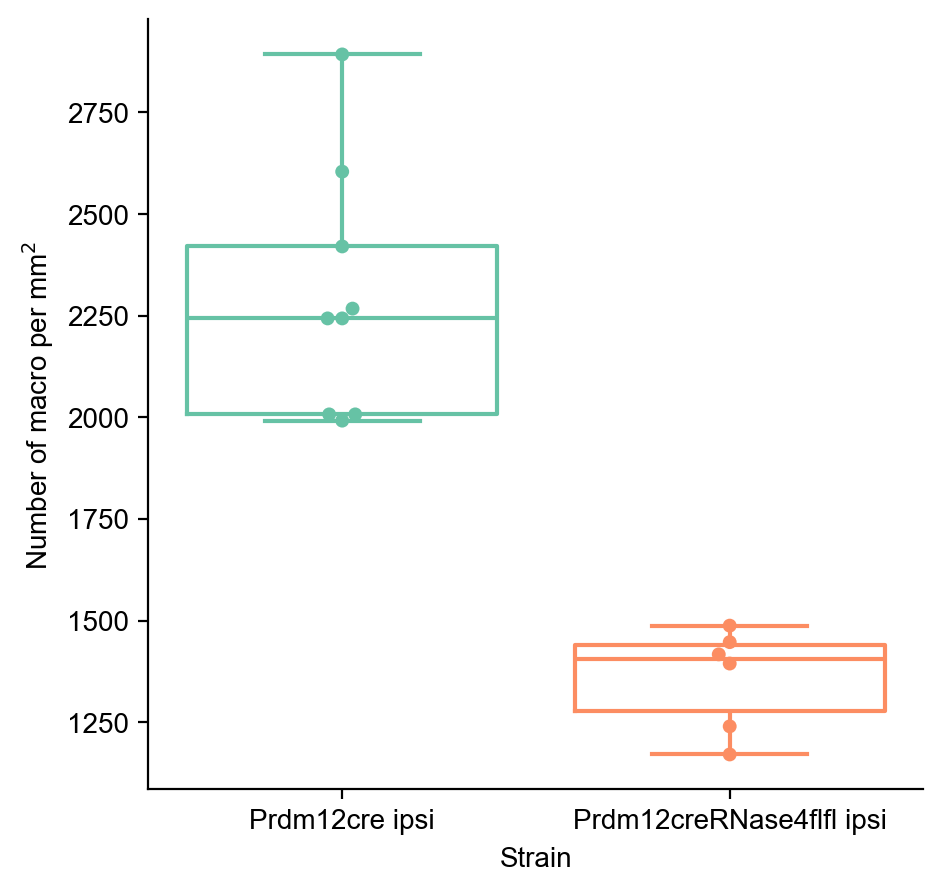

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df_macro, x='Strain', y='numb_macro', hue='Strain', showfliers=False, palette='Set2', ax=ax, fill=False)
sns.swarmplot(data=df_macro, x='Strain', y='numb_macro', hue='Strain', dodge=False, palette='Set2', ax=ax, s=5, legend=True)
ax.legend_.remove()
ax.set_ylabel('Number of macro per mm$^2$')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/numb_macro.pdf', bbox_inches='tight', dpi=300)

In [ ]:
test_res_macro = pd.DataFrame(columns=['group1','group2','p'])
for i in df_macro.Strain.unique():
    for j in df_macro.Strain.unique()[1:]:
        res = stats.ttest_ind(df_macro[df_macro.Strain == i]['numb_debris'], df_macro[df_macro.Strain == j]['numb_debris'])
        test_res_macro.loc[len(test_res_macro)] = [i, j, res.pvalue]

test_res_macro = test_res_macro.loc[lambda x: x.group1 != x.group2]
test_res_macro = test_res_macro[~test_res_macro[['group1','group2']].apply(frozenset, axis=1).duplicated()].reset_index(drop=True)
test_res_macro['p_adj'] = multipletests(test_res_macro.p, method='fdr_bh')[1]
test_res_macro

,group1,group2,p,p_adj
0,Prdm12cre ipsi,Prdm12creRNase4flfl ipsi,0.00859,0.00859


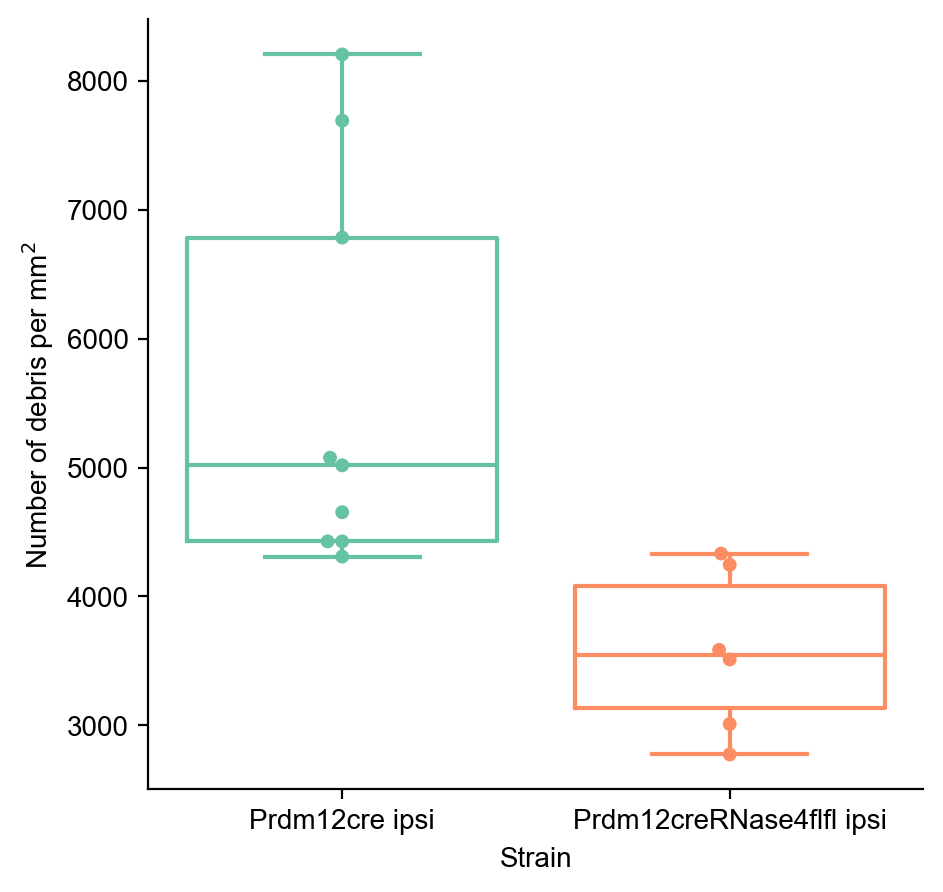

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df_macro, x='Strain', y='numb_debris', hue='Strain', showfliers=False, palette='Set2', ax=ax, fill=False)
sns.swarmplot(data=df_macro, x='Strain', y='numb_debris', hue='Strain', dodge=False, palette='Set2', ax=ax, s=5, legend=True)
ax.legend_.remove()
ax.set_ylabel('Number of debris per mm$^2$')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/numb_debris.pdf', bbox_inches='tight', dpi=300)

## Percentage of Misfolded Myelin

In [3]:
df_misfold = pd.read_excel('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/RNAse4/TEM_quant_prep.xlsx', sheet_name='misfold')

In [11]:
df_misfold.Strain = df_misfold.Strain.astype('category').cat.reorder_categories(['Prdm12cre','Prdm12creRNase4flfl'])

In [ ]:
test_res_misfold = pd.DataFrame(columns=['group1','group2','p'])
for i in df_misfold.Strain.unique():
    for j in df_misfold.Strain.unique()[1:]:
        res = stats.ttest_ind(df_misfold[df_misfold.Strain == i]['percent_misfold'], df_misfold[df_misfold.Strain == j]['percent_misfold'])
        test_res_misfold.loc[len(test_res_misfold)] = [i, j, res.pvalue]

test_res_misfold = test_res_misfold.loc[lambda x: x.group1 != x.group2]
test_res_misfold['p_adj'] = multipletests(test_res_misfold.p, method='fdr_bh')[1]

In [13]:
test_res_misfold

,group1,group2,p,p_adj
0,Prdm12creRNase4flfl,Prdm12cre,0.001272,0.001272


In [16]:
df_misfold.percent_misfold = df_misfold.percent_misfold*100

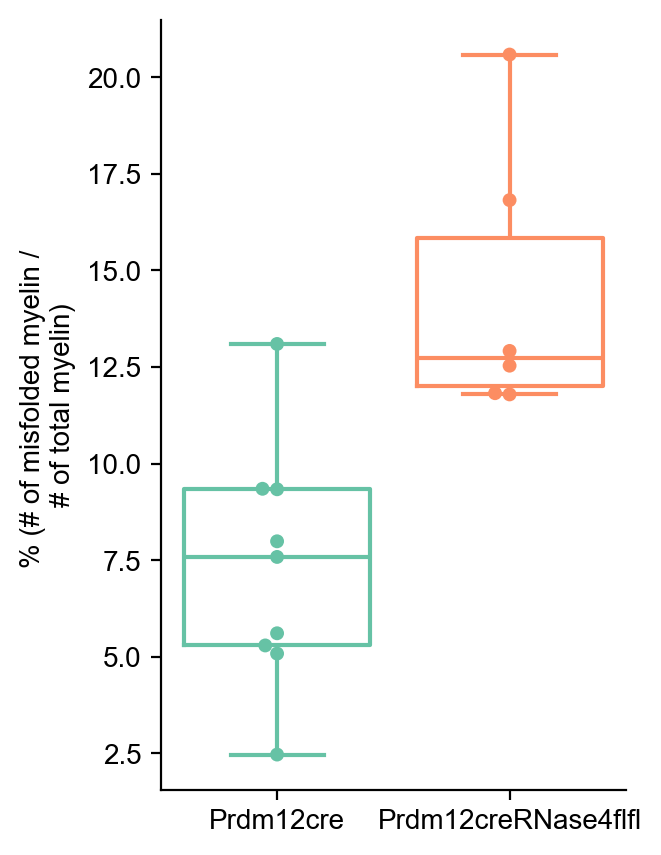

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(data=df_misfold, x='Strain', y='percent_misfold', hue='Strain', showfliers=False, palette='Set2', ax=ax, fill=False)
sns.swarmplot(data=df_misfold, x='Strain', y='percent_misfold', hue='Strain', dodge=False, palette='Set2', ax=ax, s=5, legend=True)
ax.legend_.remove()
ax.set_ylabel('% (# of misfolded myelin / \n# of total myelin)')
ax.set_xlabel('')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/percent_misfold.pdf', bbox_inches='tight', dpi=300)